In [2]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [3]:
#reading the data
data = pd.read_csv('review.csv')
data.shape

(67529, 16)

In [4]:
#looking at the head of the data

data.head()

Serial Number Company           Location          Dates  \
0              1  google               none   Dec 11, 2018   
1              2  google  Mountain View, CA   Jun 21, 2013   
2              3  google       New York, NY   May 10, 2014   
3              4  google  Mountain View, CA    Feb 8, 2015   
4              5  google    Los Angeles, CA   Jul 19, 2018   

                                  Job-Title  \
0     Current Employee - Anonymous Employee   
1         Former Employee - Program Manager   
2  Current Employee - Software Engineer III   
3     Current Employee - Anonymous Employee   
4       Former Employee - Software Engineer   

                                             Summary  \
0                           Best Company to work for   
1  Moving at the speed of light, burn out is inev...   
2  Great balance between big-company security and...   
3  The best place I've worked and also the most d...   
4                    Unique, one of a kind dream job   

                                                Pros  \
0                      People are smart and friendly   
1  1) Food, food, food. 15+ cafes on main campus ...   
2  * If you're a software engineer, you're among ...   
3  You can't find a more well-regarded company th...   
4  Google is a world of its own. At every other c...   

                                                Cons  \
0                 Bureaucracy is slowing things down   
1  1) Work/life balance. What balance? All those ...   
2  * It *is* becoming larger, and with it comes g...   
3  I live in SF so the commute can take between 1...   
4  If you don't work in MTV (HQ), you will be giv...   

                                 Advice-to-Mangement  Overall-Ratings  \
0                                               none                5   
1  1) Don't dismiss emotional intelligence and ad...                4   
2  Keep the focus on the user. Everything else wi...                5   
3  Keep on NOT micromanaging - that is a huge ben...                5   
4  Promote managers into management for their man...                5   

  Work-Balance Culture-Values Career-Opportunities Company-Benefit  \
0            4              5                    5               4   
1            2              3                    3               5   
2            5              4                    5               5   
3            2              5                    5               4   
4            5              5                    5               5   

  Senior-Mangement  Helpful-Count  
0                5              0  
1                3           2094  
2                4            949  
3                5            498  
4                5             49

In [5]:
#describing the data
data.describe()

Serial Number  Overall-Ratings  Helpful-Count
count   67529.000000     67529.000000   67529.000000
mean    33765.000000         3.826075       1.268211
std     19494.087501         1.154989      16.085852
min         1.000000         1.000000       0.000000
25%     16883.000000         3.000000       0.000000
50%     33765.000000         4.000000       0.000000
75%     50647.000000         5.000000       1.000000
max     67529.000000         5.000000    2094.000000

In [6]:
#just a look at data's information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67529 entries, 0 to 67528
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Serial Number         67529 non-null  int64 
 1   Company               67529 non-null  object
 2   Location              67529 non-null  object
 3   Dates                 67528 non-null  object
 4   Job-Title             67529 non-null  object
 5   Summary               67402 non-null  object
 6   Pros                  67529 non-null  object
 7   Cons                  67529 non-null  object
 8   Advice-to-Mangement   66857 non-null  object
 9   Overall-Ratings       67529 non-null  int64 
 10  Work-Balance          67529 non-null  object
 11  Culture-Values        67529 non-null  object
 12  Career-Opportunities  67529 non-null  object
 13  Company-Benefit       67529 non-null  object
 14  Senior-Mangement      67529 non-null  object
 15  Helpful-Count         67529 non-null

In [7]:
data.isnull().sum()

Serial Number             0
Company                   0
Location                  0
Dates                     1
Job-Title                 0
Summary                 127
Pros                      0
Cons                      0
Advice-to-Mangement     672
Overall-Ratings           0
Work-Balance              0
Culture-Values            0
Career-Opportunities      0
Company-Benefit           0
Senior-Mangement          0
Helpful-Count             0
dtype: int64

From the above data we get to know about the null values present in it.Now our task is to reduce the null values for a better reading.
thus we undergo the process of transformation.
- Few of the summary data and advice-to-management has no entries thus they are shown through isnull function

There are many rows of different columns which are filled with none and rest of the data is in int format.So here we will change those none to int zero so that we can study the data easily.This is called out as data transformation



In [8]:
data['Overall-Ratings'] = np.where(data['Overall-Ratings'] =='none', 0, data['Overall-Ratings'])
data['Work-Balance']    = np.where(data['Work-Balance']=='none',0, data['Work-Balance'])
data['Culture-Values']  = np.where(data['Culture-Values']=='none',0, data['Culture-Values'])   
data['Career-Opportunities'] =np.where(data['Career-Opportunities']=='none',0, data['Career-Opportunities'])   
data['Company-Benefit'] = np.where(data['Company-Benefit'] =='none',0,data['Company-Benefit'])  
data['Senior-Mangement'] = np.where(data['Senior-Mangement']=='none',0,data['Senior-Mangement'])    

                                   
                                   
                                   

Through the data info we observed that few of the **numeric data's** datatype is in object form.So now we will change all of them in numeric datatype 

In [9]:
data['Overall-Ratings'] = pd.to_numeric(data['Overall-Ratings'])
data['Work-Balance'] = pd.to_numeric(data['Work-Balance'])
data['Culture-Values'] = pd.to_numeric(data['Culture-Values'])
data['Career-Opportunities'] = pd.to_numeric(data['Career-Opportunities'])
data['Company-Benefit'] = pd.to_numeric(data['Company-Benefit'])
data['Senior-Mangement'] = pd.to_numeric(data['Senior-Mangement'])


Text(0.5, 1.0, 'No. of Reviews per Company')

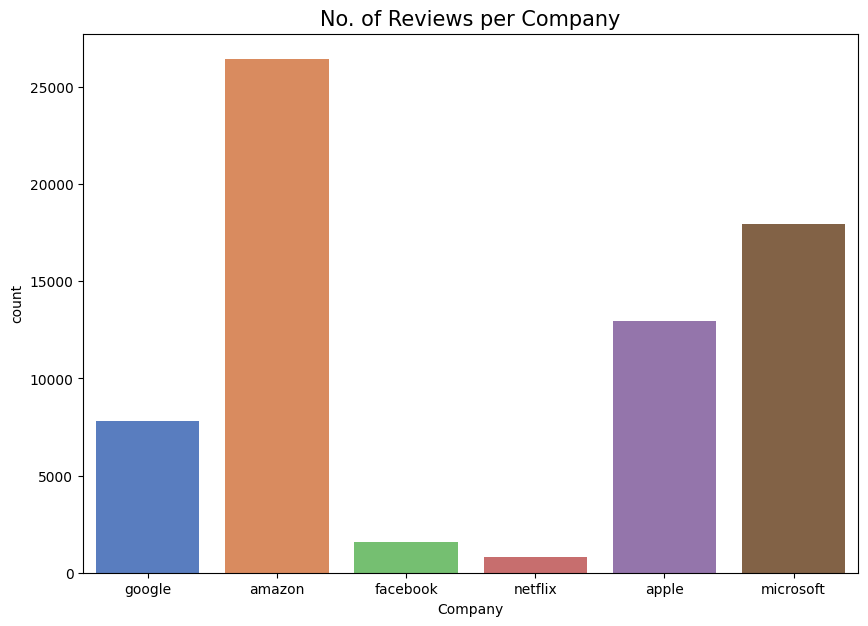

In [10]:
# let's look at the no. of reviews per companies

plt.rcParams['figure.figsize'] = (10, 7)
sns.countplot(x="Company",data=data, palette = 'muted')
plt.title('No. of Reviews per Company', fontsize = 15)

Text(0.5, 1.0, 'Company vs Career Opportunities')

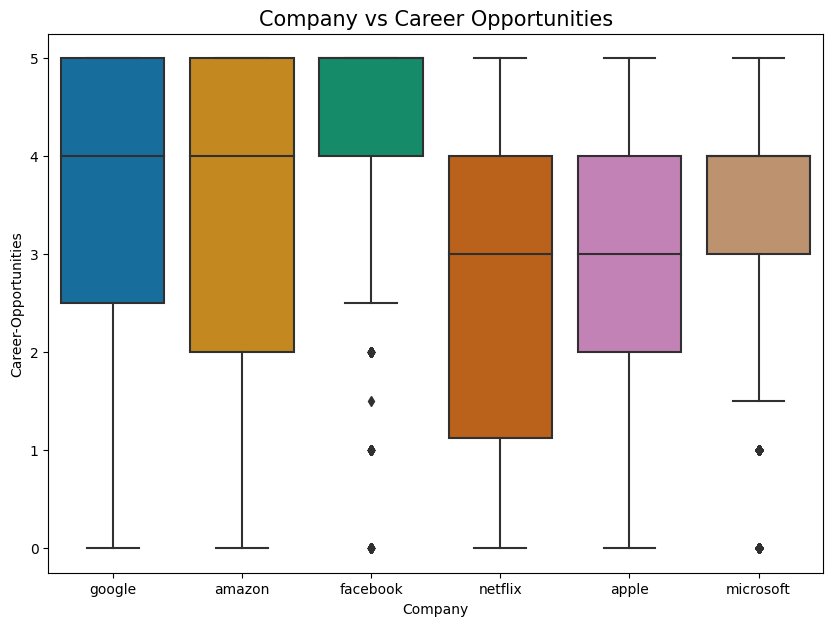

In [11]:

# company vs career opportunities

plt.rcParams['figure.figsize'] = (10, 7)
sns.boxplot(x = data['Company'], y = data['Career-Opportunities'], palette = 'colorblind')
plt.title('Company vs Career Opportunities', fontsize = 15)

Text(0.5, 1.0, 'Company vs Culture-Values')

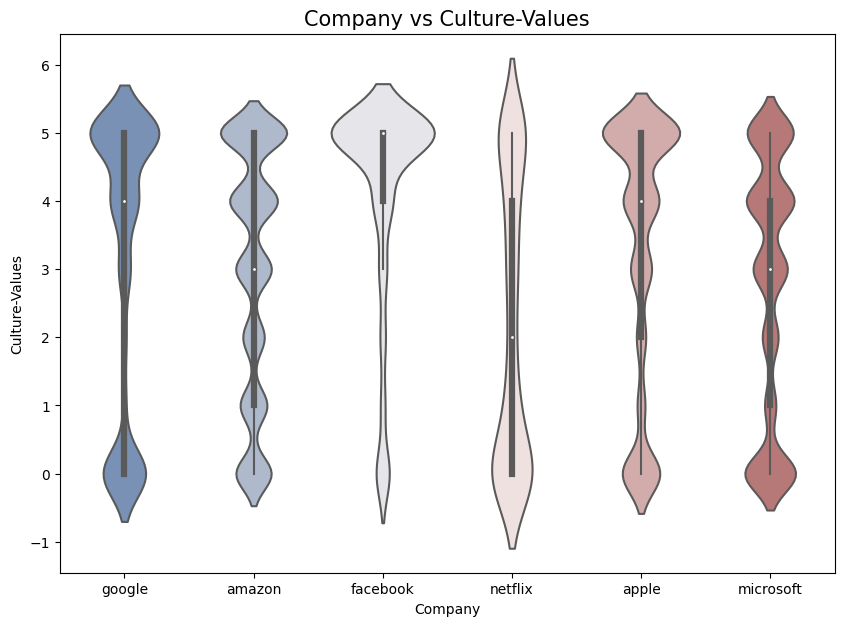

In [12]:
# company vs culture stars

plt.rcParams['figure.figsize'] = (10, 7)
sns.violinplot(x = data['Company'], y = data['Culture-Values'], palette = 'vlag')
plt.title('Company vs Culture-Values', fontsize = 15)

Text(0.5, 1.0, 'Company ve Benefits')

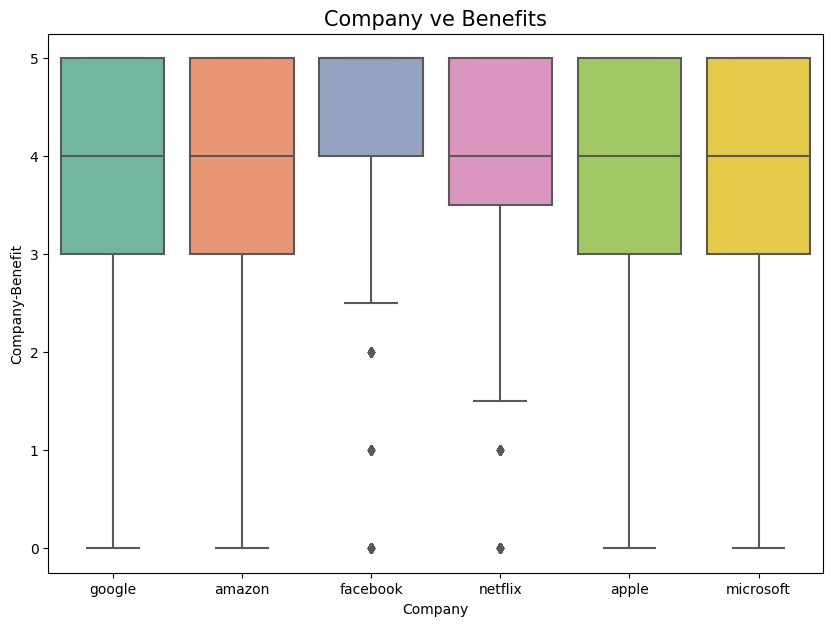

In [13]:
plt.rcParams['figure.figsize'] = (10,7)
sns.boxplot(x = data['Company'],y = data['Company-Benefit'], palette = 'Set2')
plt.title('Company ve Benefits',fontsize=15)

Text(0.5, 1.0, 'Company vs Management stars')

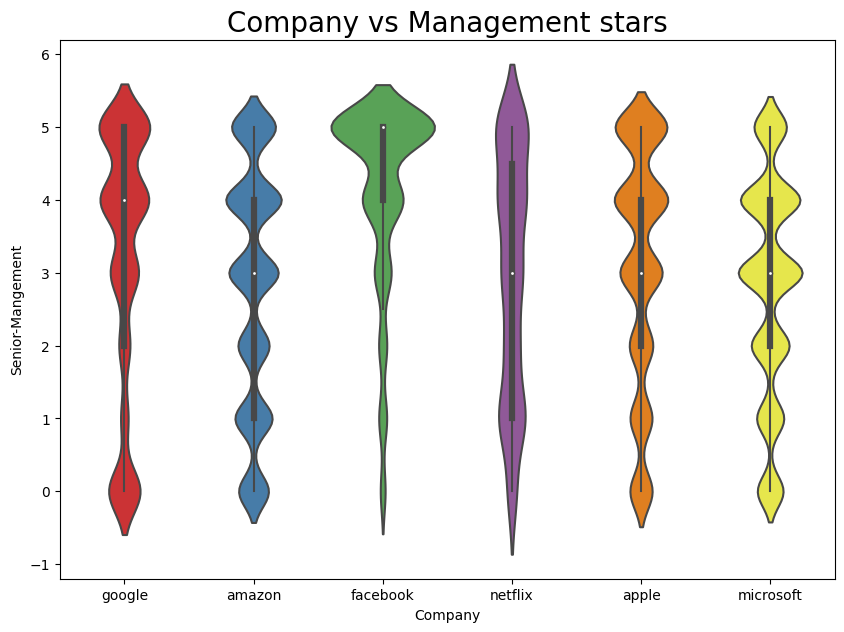

In [14]:
# company vs senior-management-stars

plt.rcParams['figure.figsize'] = (10, 7)
sns.violinplot(x = data['Company'], y = data['Senior-Mangement'], palette = 'Set1')
plt.title('Company vs Management stars', fontsize = 20)
     

Text(0.5, 1.0, 'Company vs Work-balance-stars')

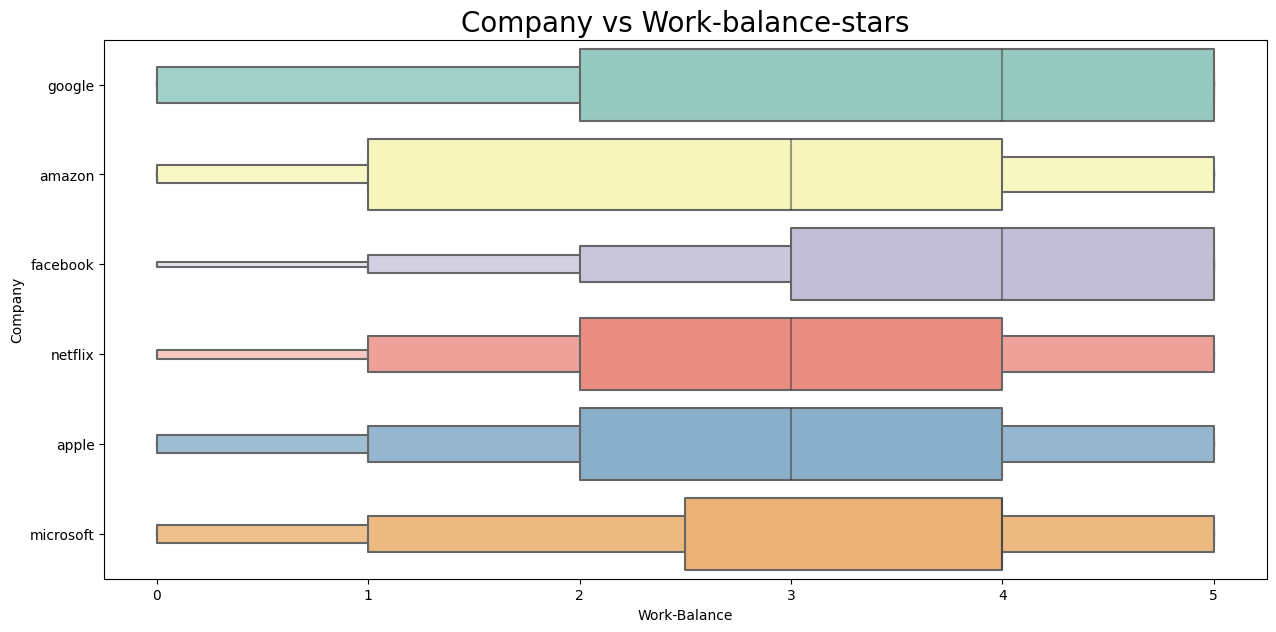

In [15]:

plt.rcParams['figure.figsize'] = (15, 7)
sns.boxenplot(y = 'Company', x ='Work-Balance', data = data, palette = 'Set3')
plt.title('Company vs Work-balance-stars', fontsize = 20)

Text(0.5, 1.0, 'Company vs Ratings')

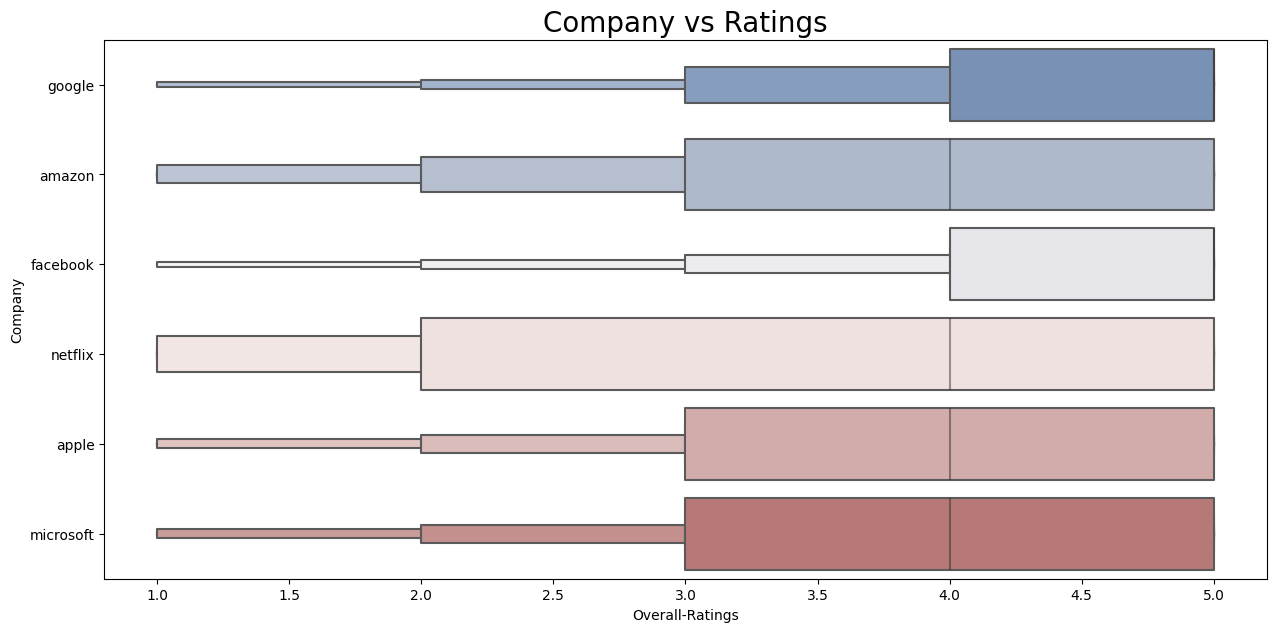

In [16]:
# company vs Rating

plt.rcParams['figure.figsize'] = (15, 7)
sns.boxenplot(x = 'Overall-Ratings', y = 'Company', data = data, palette = 'vlag')
plt.title('Company vs Ratings', fontsize = 20)
     

(-0.5, 999.5, 999.5, -0.5)

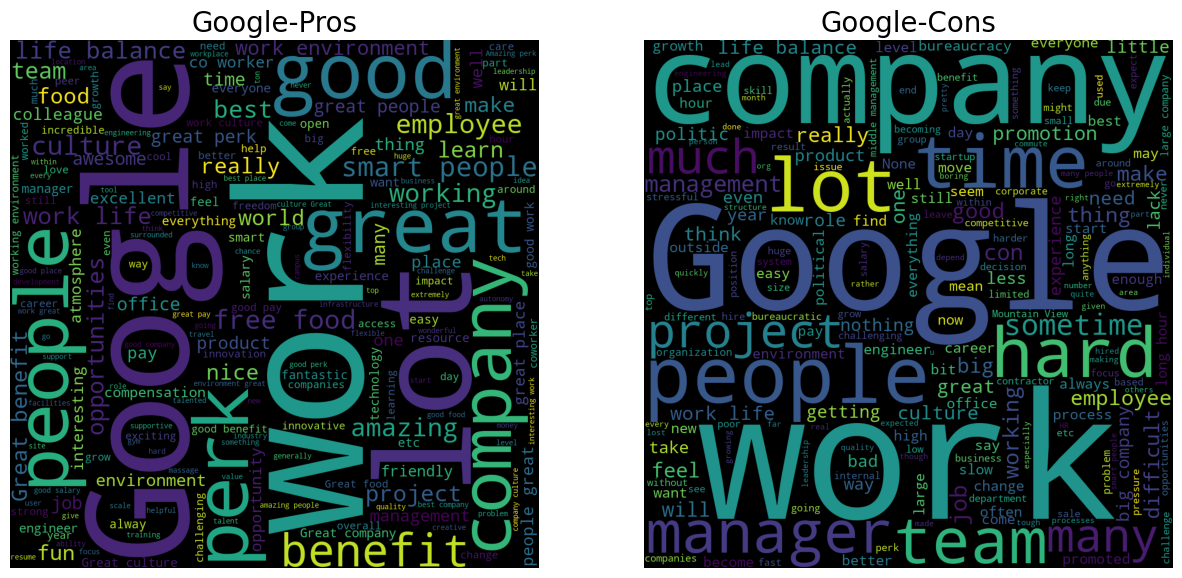

In [17]:
plt.rcParams['figure.figsize'] = (15,10)
pros = ' '.join([text for text in data ['Pros'][data['Company'] == 'google']])

wordcloud = WordCloud(background_color= 'black', width = 1000, height = 1000).generate(pros)
plt.subplot(1, 2, 1)
plt.title('Google-Pros', fontsize = 20)
plt.imshow(wordcloud)
plt.axis('off')

cons = ' '.join([text for text in data['Cons'][data['Company'] == 'google']])

wordcloud2 = WordCloud(background_color = 'black',width = 1000, height = 1000).generate(cons)
plt.subplot(1,2,2)
plt.title('Google-Cons', fontsize = 20)
plt.imshow(wordcloud2)
plt.axis('off')



(-0.5, 999.5, 999.5, -0.5)

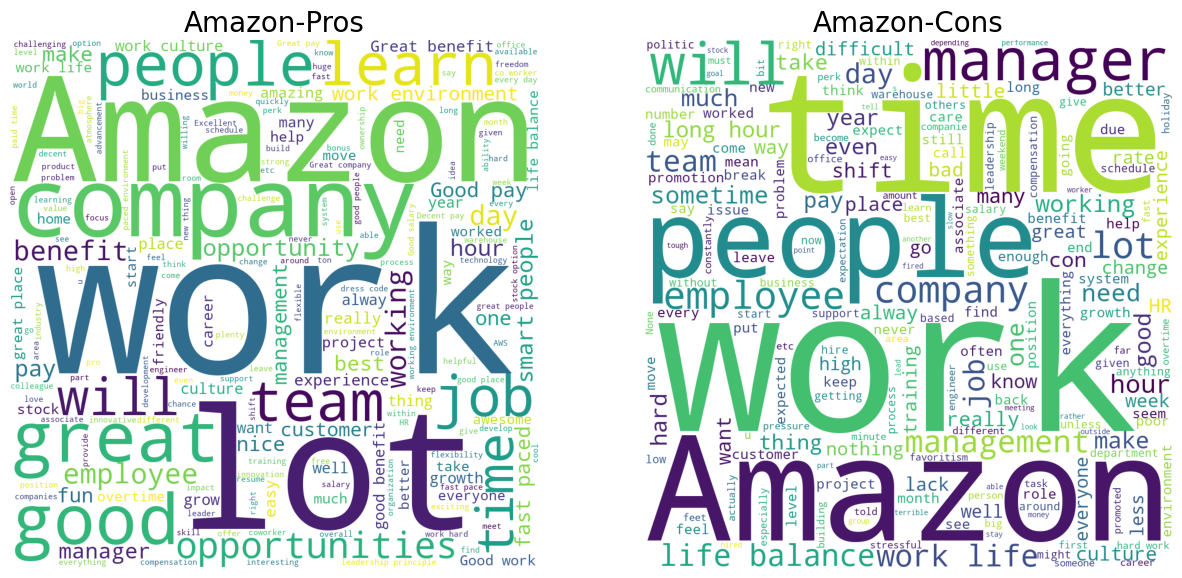

In [18]:
plt.rcParams['figure.figsize']=(15,10)

pros= ' '.join([text for text in data['Pros'][data['Company'] == 'amazon' ]])

wordcloud = WordCloud(background_color = 'white', width = 1000,height = 1000).generate(pros)
plt.subplot(1,2,1)
plt.title('Amazon-Pros',fontsize = 20)
plt.imshow(wordcloud)
plt.axis('off')

cons = ' '.join([text for text in data['Cons'][data['Company'] == 'amazon' ]])

wordcloud2 = WordCloud(background_color = 'white', width = 1000, height = 1000 ).generate(cons)
plt.subplot(1,2,2)
plt.title('Amazon-Cons',fontsize = 20)
plt.imshow(wordcloud2)
plt.axis('off')

(-0.5, 999.5, 999.5, -0.5)

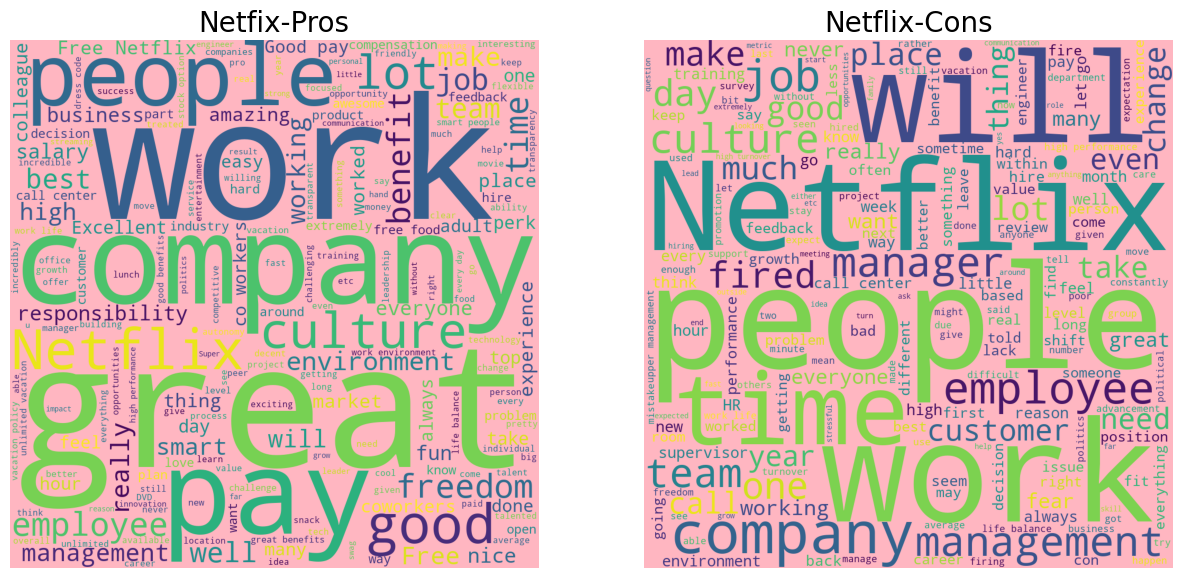

In [19]:
plt.rcParams['figure.figsize'] = (15,10)
pros=' '.join([text for text in data['Pros'][data['Company'] == 'netflix']])

wordcloud = WordCloud(background_color='lightpink', width = 1000, height =1000).generate(pros)
plt.subplot(1,2,1)
plt.title('Netfix-Pros' ,fontsize = 20)
plt.imshow(wordcloud)
plt.axis('off')

cons =' '.join([text for text in data['Cons'][data['Company'] == 'netflix']])

wordcloud2 = WordCloud(background_color = 'lightpink', width = 1000 , height = 1000).generate(cons)
plt.subplot(1,2,2)
plt.title('Netflix-Cons' ,fontsize = 20 )
plt.imshow(wordcloud2)
plt.axis('off')


(-0.5, 999.5, 999.5, -0.5)

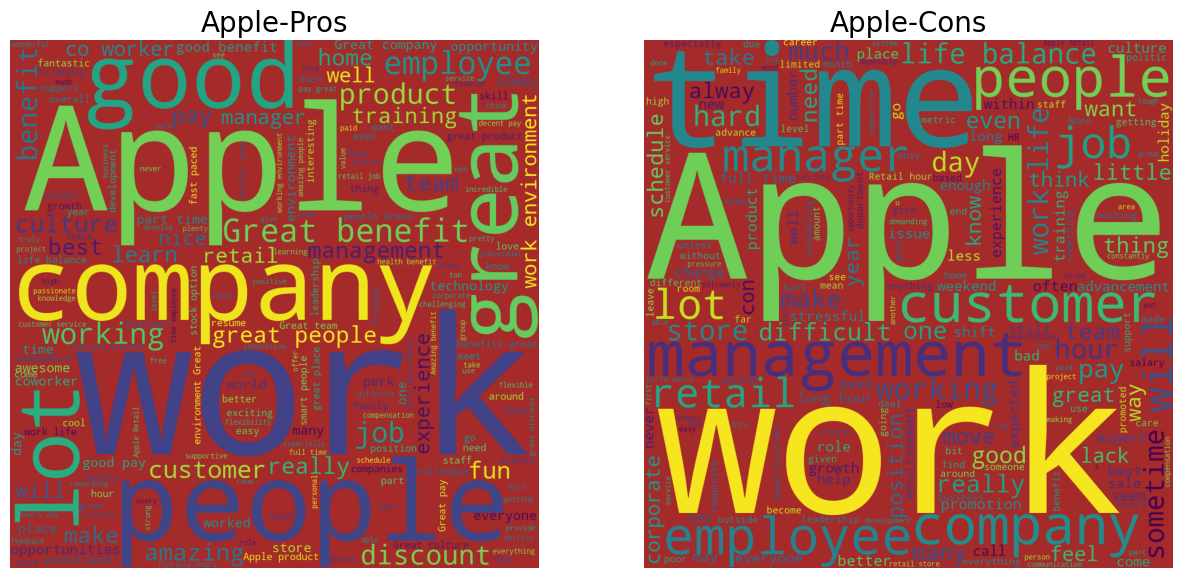

In [20]:
plt.rcParams['figure.figsize'] = (15,10)
pros=' '.join([text for text in data['Pros'][data['Company'] == 'apple']])

wordcloud = WordCloud(background_color='brown', width = 1000, height =1000).generate(pros)
plt.subplot(1,2,1)
plt.title('Apple-Pros' ,fontsize = 20)
plt.imshow(wordcloud)
plt.axis('off')

cons =' '.join([text for text in data['Cons'][data['Company'] == 'apple']])

wordcloud2 = WordCloud(background_color = 'brown', width = 1000 , height = 1000).generate(cons)
plt.subplot(1,2,2)
plt.title('Apple-Cons' ,fontsize = 20 )
plt.imshow(wordcloud2)
plt.axis('off')

(-0.5, 999.5, 999.5, -0.5)

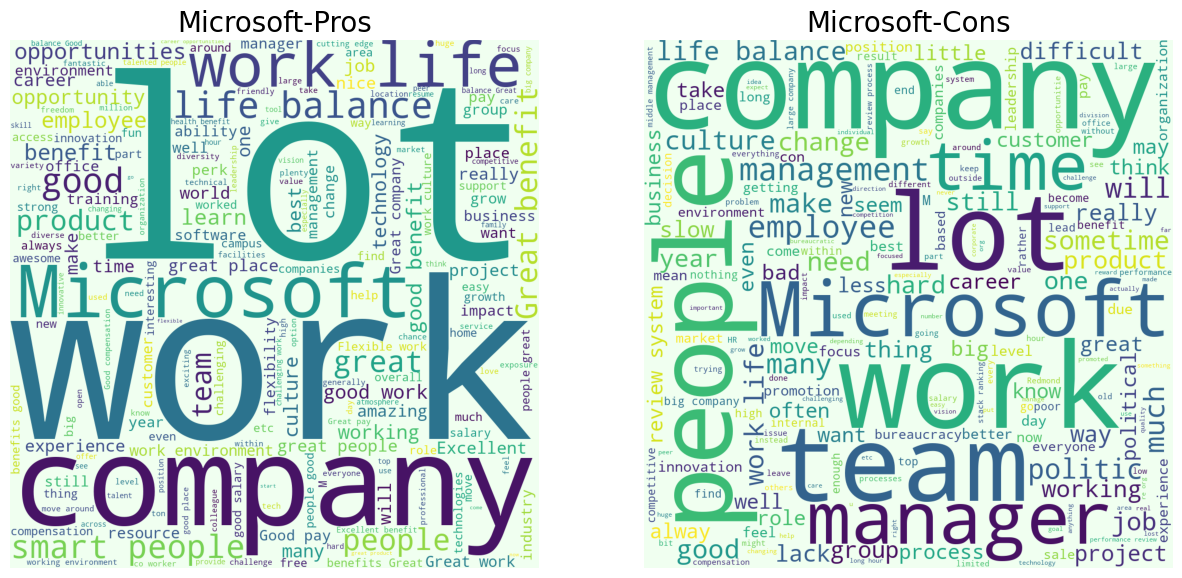

In [21]:
plt.rcParams['figure.figsize'] = (15,10)
pros=' '.join([text for text in data['Pros'][data['Company'] == 'microsoft']])

wordcloud = WordCloud(background_color='honeydew', width = 1000, height =1000).generate(pros)
plt.subplot(1,2,1)
plt.title('Microsoft-Pros' ,fontsize = 20)
plt.imshow(wordcloud)
plt.axis('off')

cons =' '.join([text for text in data['Cons'][data['Company'] == 'microsoft']])

wordcloud2 = WordCloud(background_color = 'honeydew', width = 1000 , height = 1000).generate(cons)
plt.subplot(1,2,2)
plt.title('Microsoft-Cons' ,fontsize = 20 )
plt.imshow(wordcloud2)
plt.axis('off')

(-0.5, 999.5, 999.5, -0.5)

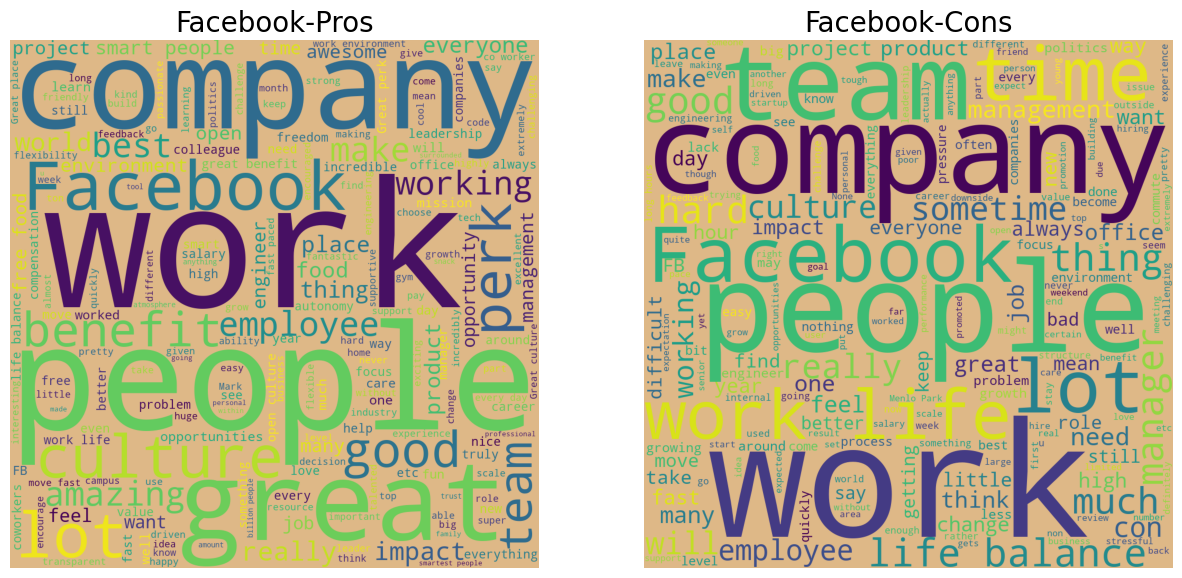

In [22]:
plt.rcParams['figure.figsize']=(15,10)
pros=' '.join([text for text in data['Pros'][data['Company'] =='facebook']])

wordcloud = WordCloud(background_color = 'burlywood', width = 1000, height = 1000).generate(pros)
plt.subplot(1,2,1)
plt.title('Facebook-Pros',fontsize=20)
plt.imshow(wordcloud)
plt.axis('off')

cons=' '.join([text for text in data['Cons'][data['Company'] =='facebook']])

wordcloud = WordCloud(background_color = 'burlywood', width = 1000, height = 1000).generate(cons)
plt.subplot(1,2,2)
plt.title('Facebook-Cons',fontsize=20)
plt.imshow(wordcloud)
plt.axis('off')

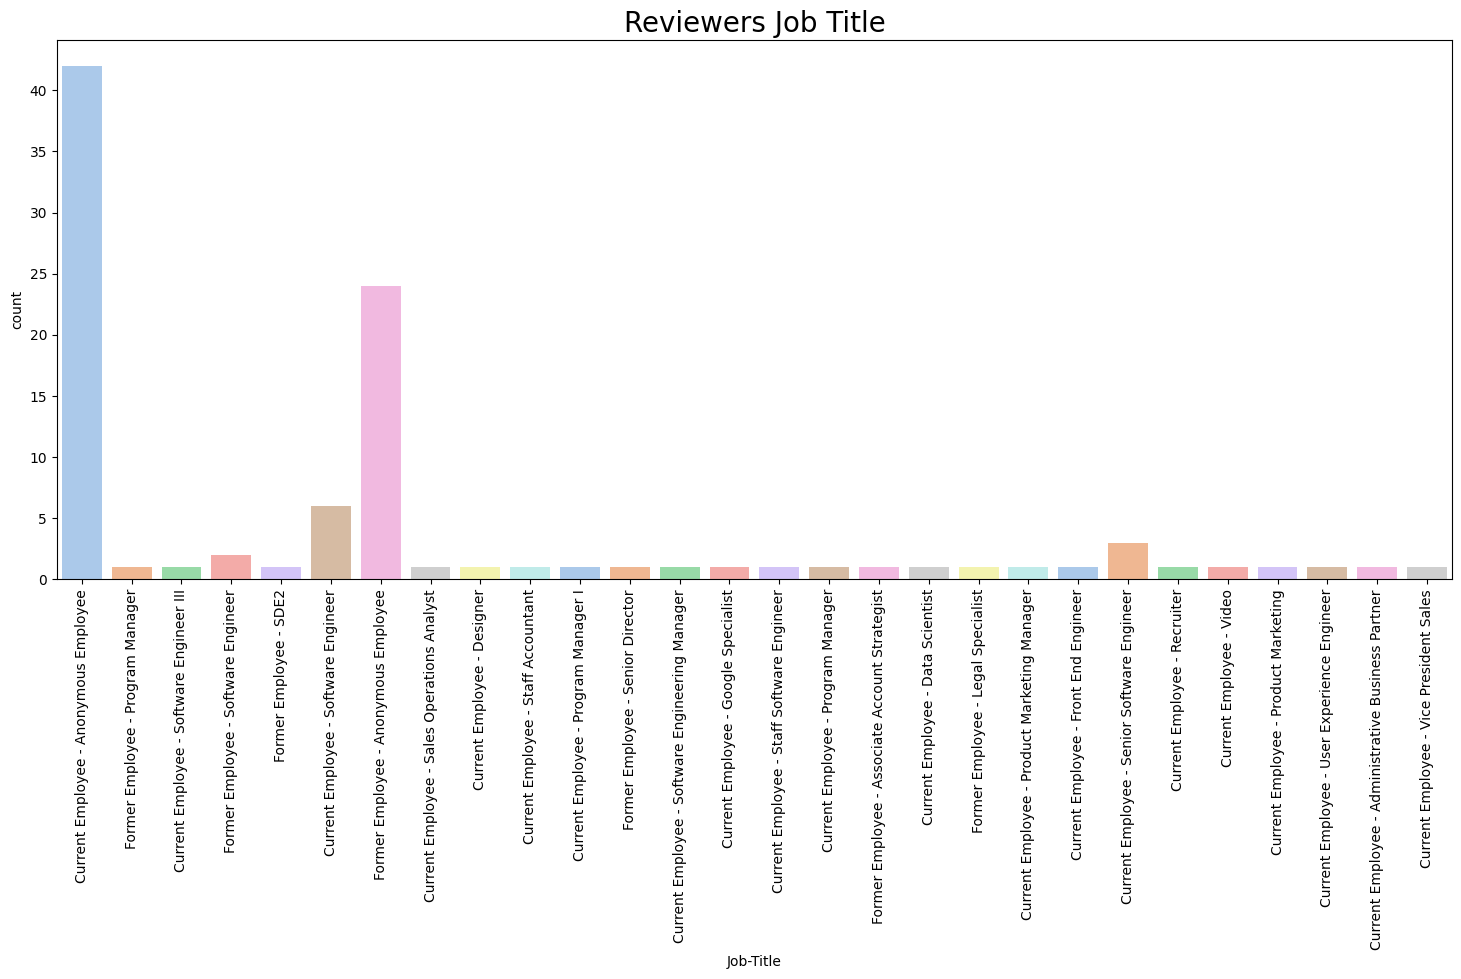

In [30]:

# reviewers' job-title

plt.rcParams['figure.figsize'] = (18, 7)
sns.countplot(x="Job-Title",data=data.head(100), palette = 'pastel')
plt.title('Reviewers Job Title', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()
     

In [31]:
for i in range(1,6):
    tmp = data.query('Summary==@i').sample(1)
    print(colored(tmp.Company.values[0].upper(),'blue'),
          '\n'+tmp.headline.values[0],'\nHeadline: ',tmp.headline.values[0],colored('\nPros:','green'),tmp.Pros.values[0],colored('\nCons:','red'),tmp.Cons.values[0],'\nRating:',colored(tmp.Summary.values[0],'red'),'\n')

ValueError: a must be greater than 0 unless no samples are taken

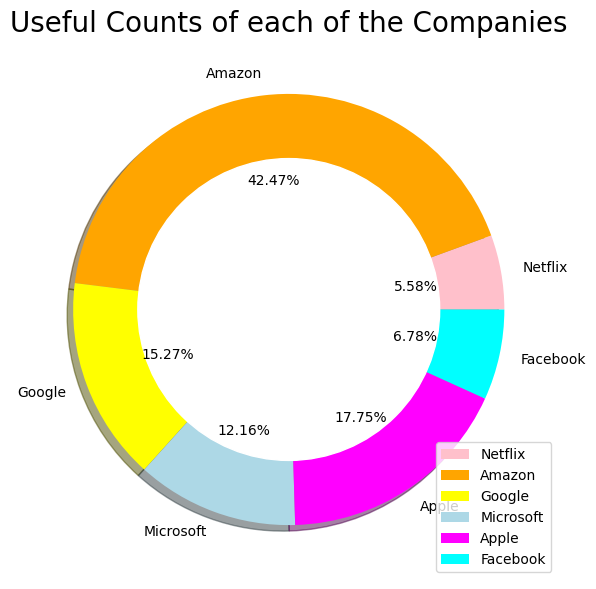

In [33]:

netflix = data['Helpful-Count'][data['Company'] == 'netflix'].sum().mean()
amazon = data['Helpful-Count'][data['Company'] == 'amazon'].sum().mean()
google = data['Helpful-Count'][data['Company'] == 'google'].sum().mean()
microsoft = data['Helpful-Count'][data['Company'] == 'microsoft'].sum().mean()
apple = data['Helpful-Count'][data['Company'] == 'apple'].sum().mean()
facebook = data['Helpful-Count'][data['Company'] == 'facebook'].sum().mean()

# let's make a pie chart for avg. useful counts for each of the company
size = [netflix, amazon, google, microsoft, apple, facebook]
labels = "Netflix", "Amazon", "Google", "Microsoft", "Apple", "Facebook"
colors = ['pink', 'orange', 'yellow', 'lightblue', 'magenta', 'cyan']

circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 7)
plt.pie(size, labels = labels, colors = colors, shadow = True, autopct = '%.2f%%')
plt.title('Useful Counts of each of the Companies', fontsize = 20)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()
plt.show()
     
